<a href="https://colab.research.google.com/github/aryanriyanto/project-Data-Processing/blob/main/Random_Forest_Prediksi_Banjir_Di_Kabupaten_Bandung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

بِسْــــــــــــــــــمِ اللهِ الرَّحْمَنِ الرَّحِيْمِ


# **Prediksi Banjir di Kabupaten Bandung, Jawa Barat**
## Random Forest_Prediksi_Banjir_Di_Kabupaten_Bandung


#Preprocessing Data


* Pembersihan Kolom Lokasi: Mengubah lokasi sesuai format yang diinginkan.
* Penanganan Nilai Kosong: Mengisi atau menghapus nilai yang hilang.
* Encoding Data Kategorikal: Mengubah data kategori menjadi numerik jika diperlukan.
* Normalisasi/Penskalaan Data: Menyesuaikan skala data numerik.
* Menghapus Duplikasi: Memastikan tidak ada duplikasi data dalam dataset.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/Dataset_Banjir_Lengkap_Final.csv")
df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5,3,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5,3,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5,3,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3,3,1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3,3,1


In [ ]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
df.shape
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
df.shape


(262, 8)

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 0 to 678
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lokasi                262 non-null    object 
 1   latitude              262 non-null    object 
 2   longitude             262 non-null    object 
 3   curah_hujan           262 non-null    float64
 4   penggunaan lahan      262 non-null    int64  
 5   jenis tanah           262 non-null    int64  
 6   Kategori Curah Hujan  262 non-null    int64  
 7   Labeling              262 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


,0
lokasi,0
latitude,0
longitude,0
curah_hujan,0
penggunaan lahan,0
jenis tanah,0
Kategori Curah Hujan,0
Labeling,0


In [ ]:
df['penggunaan lahan'].value_counts()

,count
penggunaan lahan,
6,71
9,66
1,54
5,40
7,20
2,7
3,2
4,2


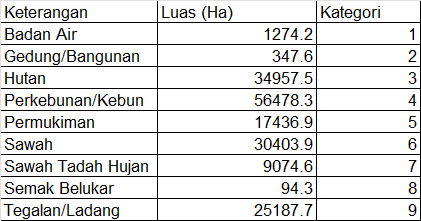

In [ ]:
df['jenis tanah'].value_counts()

,count
jenis tanah,
5,90
6,89
3,49
1,15
8,8
7,7
4,4


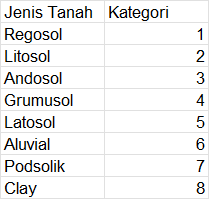

### **Kategori Curah Hujan**

In [ ]:
import pandas as pd

def categorize_rainfall(curah_hujan):
  try:

    curah_hujan = int(curah_hujan)
  except ValueError:

    return None

  if curah_hujan < 1500:
    return 1
  elif 1500 <= curah_hujan <= 2000:
    return 2
  elif 2001 <= curah_hujan <= 2500:
    return 3
  elif 2501 <= curah_hujan <= 3000:
    return 4
  elif curah_hujan > 3000:
    return 5
  else:
    return None

df['curah_hujan'] = pd.to_numeric(df['curah_hujan'], errors='coerce')

df['Kategori Curah Hujan'] = df['curah_hujan'].apply(categorize_rainfall)
df

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,3,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,3,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,3,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,3,1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,3,1
...,...,...,...,...,...,...,...,...
619,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,3,1
620,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,1,0
675,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,1,0
676,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,2,0


In [ ]:
df['Kategori Curah Hujan'] = pd.qcut(df['curah_hujan'], q=5, labels=[1, 2, 3, 4, 5])
df['Kategori Curah Hujan'].value_counts()

,count
Kategori Curah Hujan,
1,53
4,53
2,52
3,52
5,52


## **Labeling Data Banjir**
dengan ketentuan

*   1 = Rawan
*   0 = Tidak Rawan

In [ ]:
def labeling_banjir(row):
    if row['penggunaan lahan'] >= 4 and row['jenis tanah'] >= 4 and row['Kategori Curah Hujan'] >= 3:
        return 1
    else:
        return 0

df['Labeling'] = df.apply(labeling_banjir, axis=1)
df

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,5,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,5,1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,5,1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,4,0
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,5,0
...,...,...,...,...,...,...,...,...
619,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,2,0
620,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,1,0
675,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,1,0
676,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,2,0


In [ ]:
df['Labeling'].value_counts()

,count
Labeling,
0,158
1,104


## Data Lokasi Kejadian
data dari BNPB

In [ ]:
# Define lists for prefixes that need to be replaced with commas in 'lokasi'
prefixes_kecamatan = ['Kec.', 'Kec', 'kec.', 'kec', 'KEC.', 'KEC', 'kecamatan', 'Kecamatan', 'KECAMATAN']
prefixes_desa = ['Des.', 'Des', 'des.', 'des', 'Desa.', 'Desa', 'Ds.', 'Ds', 'Kel.', 'Kel', 'kel.', 'kel', 'KEL.', 'KEL']

# Function to clean and format 'lokasi' column
def clean_location(location):
    location = str(location).strip()

    # Add standard prefix if not present
    if not location.startswith("JAWA BARAT, KABUPATEN BANDUNG,"):
        location = "JAWA BARAT, KABUPATEN BANDUNG, " + location

    # Replace prefixes with commas
    for prefix in prefixes_kecamatan + prefixes_desa:
        location = location.replace(prefix, ',')

    # Split location by commas, remove duplicates, and remove empty strings
    parts = [part.strip() for part in location.split(',') if part.strip()]
    unique_parts = []
    for part in parts:
        if part not in unique_parts:
            unique_parts.append(part)

    # Join the unique parts with commas, convert to uppercase, and return
    return ', '.join(unique_parts).upper()

# Apply cleaning function to 'lokasi' column
df['lokasi'] = df['lokasi'].apply(clean_location)

# Convert 'latitude' and 'longitude' to numeric, replacing commas if necessary
df['latitude'] = pd.to_numeric(df['latitude'].str.replace('.', '', regex=False), errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'].str.replace('.', '', regex=False), errors='coerce')

# Check for any NaN values after conversion for latitude and longitude
df[['latitude', 'longitude']].isnull().sum(), df.head()


(latitude     0
 longitude    0
 dtype: int64,
                                               lokasi  latitude  longitude  \
 0  JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...  -7049881  107521854   
 1  JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...  -7065081  107518936   
 2  JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...  -7079423  107499905   
 3  JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...  -7127131  107488809   
 4  JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...  -7130081  107459001   
 
    curah_hujan  penggunaan lahan  jenis tanah Kategori Curah Hujan  Labeling  
 0      2272.94                 1            5                    5         0  
 1      2267.37                 5            5                    5         1  
 2      2269.68                 5            5                    5         1  
 3      2216.54                 7            3                    4         0  
 4      2383.19                 5            3                    5         0  )

##Menormalkan data Numerik

In [ ]:
# Check for duplicate rows based on all columns
duplicates = df.duplicated().sum()

# Normalizing 'curah_hujan', 'penggunaan lahan', 'jenis tanah', 'Kategori Curah Hujan', and 'Labeling' columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[[ 'penggunaan lahan', 'jenis tanah', 'Kategori Curah Hujan', 'Labeling']] = scaler.fit_transform(
    df[[ 'penggunaan lahan', 'jenis tanah', 'Kategori Curah Hujan', 'Labeling']])

# Display result of normalization and check duplicates
df, duplicates


(                                                lokasi  latitude  longitude  \
 0    JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...  -7049881  107521854   
 1    JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...  -7065081  107518936   
 2    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...  -7079423  107499905   
 3    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...  -7127131  107488809   
 4    JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...  -7130081  107459001   
 ..                                                 ...       ...        ...   
 619  JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR  -7028698  107777331   
 620           JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG  -6979043  107782748   
 675  JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...  -7009957  107875985   
 676  JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...  -6981591  107832724   
 678  JAWA BARAT, KABUPATEN BANDUNG, MAJALAYA, BOJON...  -7026543  107870048   
 
      curah_hujan  penggunaan lahan  j

Normalisasi Data Numerik: Kolom numerik curah_hujan, penggunaan lahan, jenis tanah, Kategori Curah Hujan, dan Labeling telah dinormalisasi dengan rentang 0 hingga 1 menggunakan MinMaxScaler.

In [ ]:
df['Labeling'].value_counts()

,count
Labeling,
0.0,158
1.0,104


#Eksplorasi Data (EDA)

* Distribusi Lokasi: Mengetahui jumlah kejadian banjir di tiap kecamatan atau desa yang tercatat.
* Analisis Curah Hujan: Mengetahui distribusi data curah hujan untuk melihat hubungan potensial antara curah hujan dan kejadian banjir.
* Hubungan Geografis: Menganalisis hubungan lokasi (latitude dan longitude) dengan kejadian banjir.
* Korelasi Fitur: Mencari korelasi antara fitur seperti curah_hujan, penggunaan lahan, dan jenis tanah.
* Kategori Curah Hujan: Menganalisis distribusi kategori curah hujan untuk melihat apakah ada hubungan antara kategori tertentu dan kejadian banjir.

In [ ]:
df.columns

Index(['lokasi', 'latitude', 'longitude', 'curah_hujan', 'penggunaan lahan',
       'jenis tanah', 'Kategori Curah Hujan', 'Labeling'],
      dtype='object')

###Distribusi

<ipython-input-16-e104bbac9126>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")


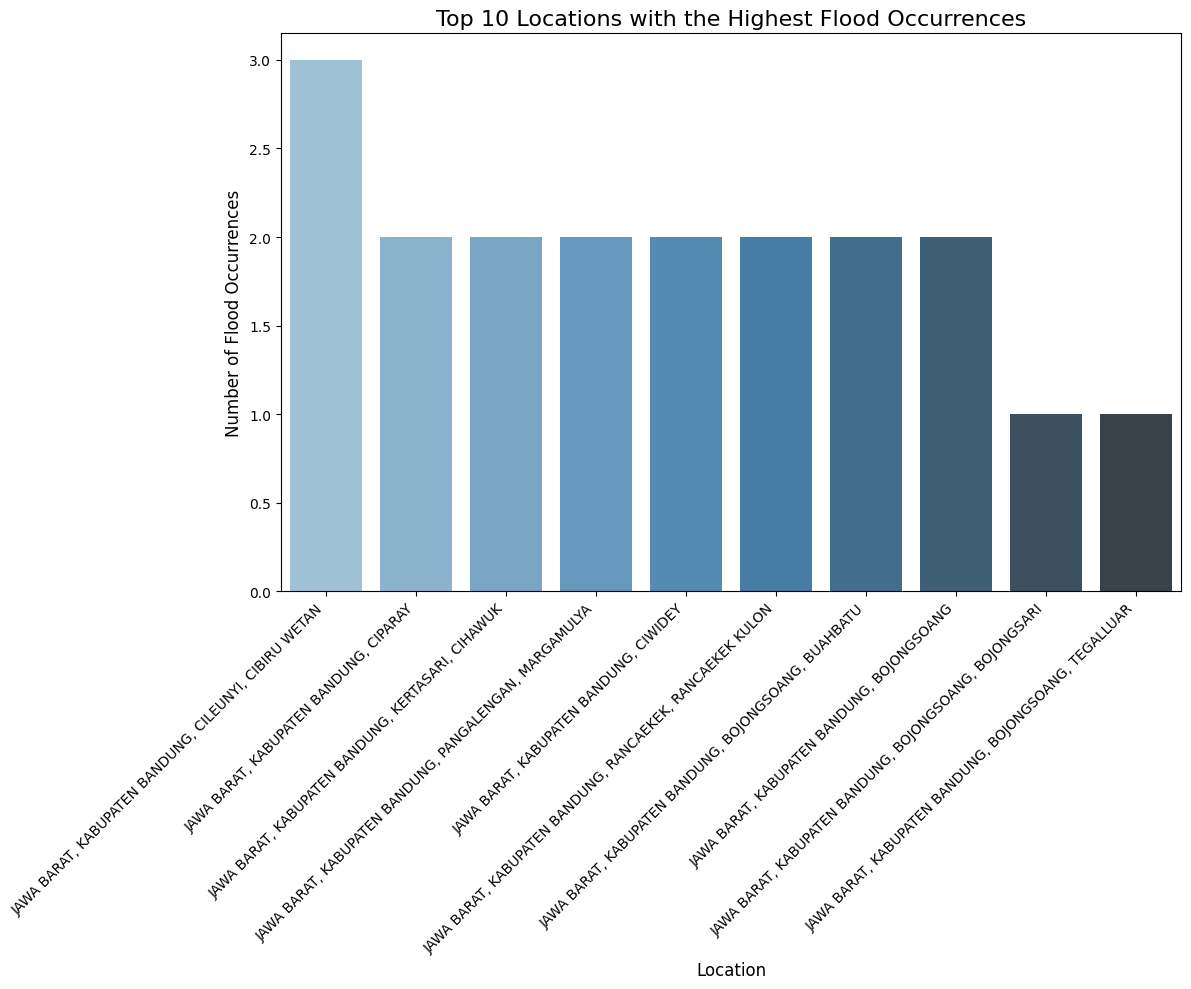

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 locations with the highest flood occurrences
top_10_locations = df['lokasi'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")
plt.title('Top 10 Locations with the Highest Flood Occurrences', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Flood Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

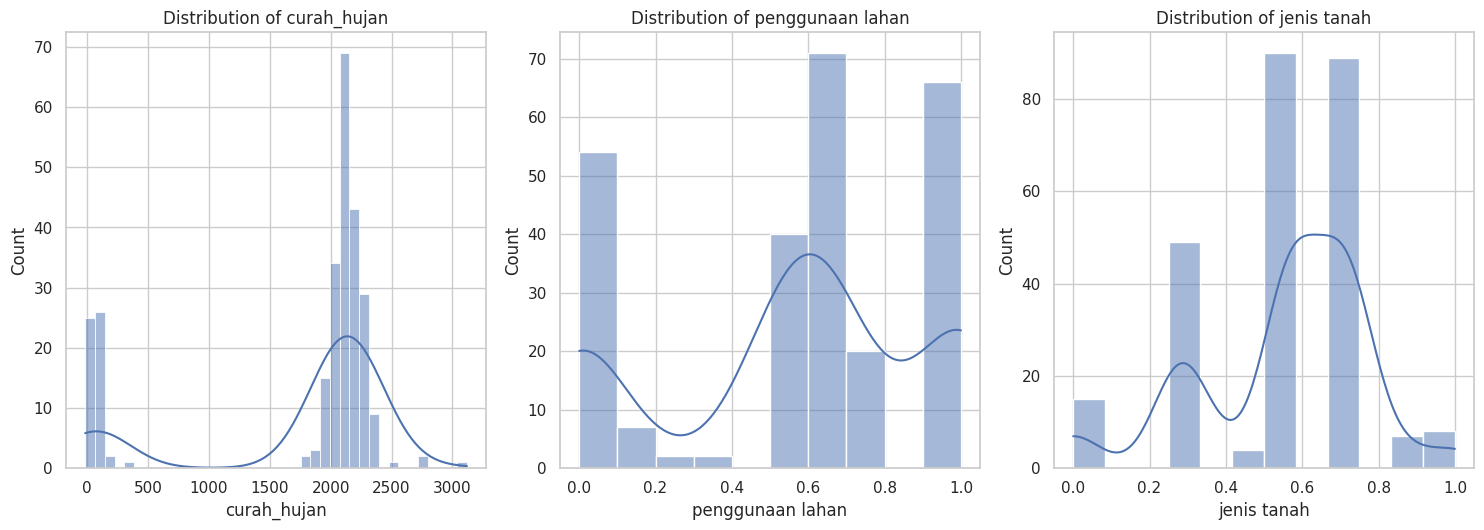

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histograms to visualize the distribution of numerical features
numerical_columns = ['curah_hujan', 'penggunaan lahan', 'jenis tanah']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

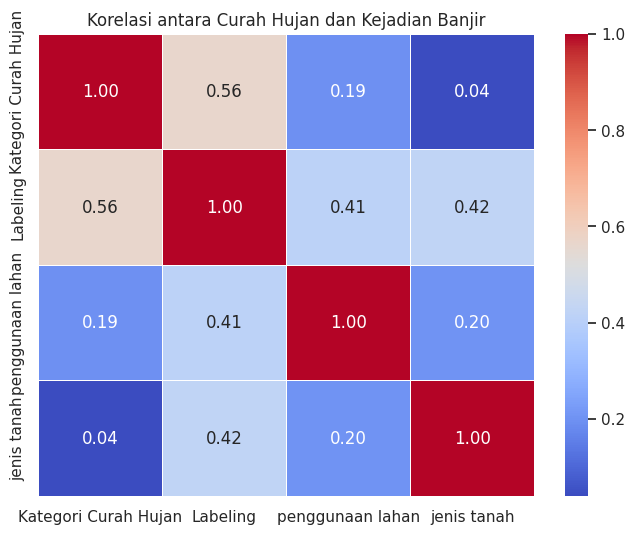

In [ ]:
# Menghitung korelasi Pearson untuk variabel numerik
correlation_matrix = df[['Kategori Curah Hujan', 'Labeling','penggunaan lahan', 'jenis tanah']].corr()

# Visualisasi Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Curah Hujan dan Kejadian Banjir')
plt.show()


###Hubungan Geografis
hubungan kejadian dengan koordinat geografis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Define a function to clean coordinate strings
def clean_coordinate(value):

    return value

# Apply the cleaning function to the longitude and latitude columns
df['longitude'] = df['longitude'].apply(clean_coordinate)
df['latitude'] = df['latitude'].apply(clean_coordinate)

# Create the geometry objects
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Create the GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Inspect the data
gdf.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling,geometry
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7049881,107521854,2272.94,0.00,0.571429,1.00,0.0,POINT (107521854 -7049881)
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7065081,107518936,2267.37,0.50,0.571429,1.00,1.0,POINT (107518936 -7065081)
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7079423,107499905,2269.68,0.50,0.571429,1.00,1.0,POINT (107499905 -7079423)
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7127131,107488809,2216.54,0.75,0.285714,0.75,0.0,POINT (107488809 -7127131)
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7130081,107459001,2383.19,0.50,0.285714,1.00,0.0,POINT (107459001 -7130081)


In [ ]:
# Menghitung frekuensi kejadian banjir per wilayah geografis
banjir_per_area = gdf.groupby(['longitude', 'latitude']).size().reset_index(name='jumlah_banjir')

# Menampilkan beberapa data frekuensi
banjir_per_area

,longitude,latitude,jumlah_banjir
0,1074652,-7089728,1
1,1075365,-7013232,1
2,1076437,-6993945,1
3,1078934,-7022122,2
4,10744017,-7120492,1
...,...,...,...
226,107870048,-7026543,2
227,107875985,-7009957,2
228,107887255,-6970147,1
229,107891743,-7034742,1


In [ ]:
merged_df = pd.merge(gdf, banjir_per_area, on=['longitude', 'latitude'], how='left')
merged_df

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling,geometry,jumlah_banjir
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7049881,107521854,2272.940,0.000,0.571429,1.00,0.0,POINT (107521854 -7049881),1
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7065081,107518936,2267.370,0.500,0.571429,1.00,1.0,POINT (107518936 -7065081),1
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7079423,107499905,2269.680,0.500,0.571429,1.00,1.0,POINT (107499905 -7079423),1
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7127131,107488809,2216.540,0.750,0.285714,0.75,0.0,POINT (107488809 -7127131),1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7130081,107459001,2383.190,0.500,0.285714,1.00,0.0,POINT (107459001 -7130081),2
...,...,...,...,...,...,...,...,...,...,...
257,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7028698,107777331,2039.690,0.625,0.714286,0.25,0.0,POINT (107777331 -7028698),1
258,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6979043,107782748,31.229,0.625,0.714286,0.00,0.0,POINT (107782748 -6979043),1
259,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7009957,107875985,26.390,0.750,0.571429,0.00,0.0,POINT (107875985 -7009957),2
260,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6981591,107832724,1925.330,0.625,0.571429,0.25,0.0,POINT (107832724 -6981591),2


In [ ]:
merged_df.isnull().sum()

,0
lokasi,0
latitude,0
longitude,0
curah_hujan,0
penggunaan lahan,0
jenis tanah,0
Kategori Curah Hujan,0
Labeling,0
geometry,0
jumlah_banjir,0


# **Pemodelan Random Forest**


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        38
         1.0       1.00      0.93      0.97        15

    accuracy                           0.98        53
   macro avg       0.99      0.97      0.98        53
weighted avg       0.98      0.98      0.98        53

Akurasi Model: 0.98
Cohen's Kappa: 0.95


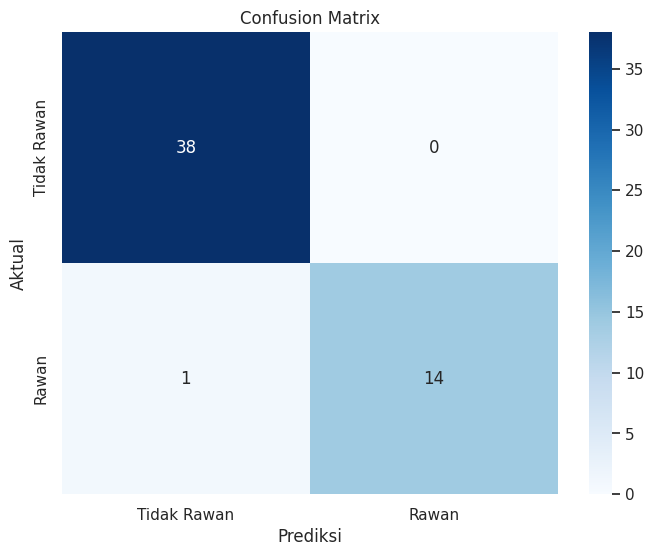

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur (X) dan target (y)
X = merged_df[['Kategori Curah Hujan', 'penggunaan lahan', 'jenis tanah', 'jumlah_banjir']]  # Pilih fitur yang relevan
y = merged_df['Labeling']  # Kolom target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% data latih, 20% data uji

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Gunakan 100 pohon keputusan

# Latih model menggunakan data latih
rf_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred)) # Laporan klasifikasi
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy:.2f}") # Akurasi model
print(f"Cohen's Kappa: {kappa:.2f}") # Cohen's Kappa

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Rawan', 'Rawan'],
            yticklabels=['Tidak Rawan', 'Rawan'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


80% Data Latih, 20% Data Uji

Akurasi Model: 98.11%
Observasi:
Model menunjukkan performa yang sangat baik pada data uji, dengan nilai precision, recall, dan f1-score mendekati sempurna.
Tidak ada tanda-tanda overfitting karena performa pada data uji tetap tinggi meskipun data latih lebih banyak.
Ini merupakan pembagian yang seimbang untuk dataset dengan ukuran terbatas.

In [ ]:
#menghitung Cohen's dari Overall Accuracy
kappa_from_overall = cohen_kappa_score(y_test, y_pred)

#menghitung cohen kappa dari accuracy per class
kappa_per_class = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f"Cohen's Kappa dari Overall Accuracy: {kappa_from_overall:.2f}")
print(f"Cohen's Kappa dari Accuracy per Class: {kappa_per_class:.2f}")

Cohen's Kappa dari Overall Accuracy: 0.95
Cohen's Kappa dari Accuracy per Class: 0.95


## Prediksi Seluruh dataset

In [ ]:
# Prediksi pada seluruh dataset
y_pred_class = rf_classifier.predict(X)  # Hasil prediksi (kelas)
y_pred_prob = rf_classifier.predict_proba(X)[:, 1]  # Probabilitas kelas positif (jika biner)

# Tambahkan hasil prediksi ke dataset
merged_df['Hasil_Prediksi'] = y_pred_class
merged_df['Probabilitas_Prediksi'] = y_pred_prob

# Tampilkan dataset dengan hasil prediksi
merged_df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling,geometry,jumlah_banjir,Hasil_Prediksi,Probabilitas_Prediksi
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7049881,107521854,2272.94,0.00,0.571429,1.00,0.0,POINT (107521854 -7049881),1,0.0,0.01
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7065081,107518936,2267.37,0.50,0.571429,1.00,1.0,POINT (107518936 -7065081),1,1.0,0.99
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7079423,107499905,2269.68,0.50,0.571429,1.00,1.0,POINT (107499905 -7079423),1,1.0,0.99
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7127131,107488809,2216.54,0.75,0.285714,0.75,0.0,POINT (107488809 -7127131),1,0.0,0.00
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7130081,107459001,2383.19,0.50,0.285714,1.00,0.0,POINT (107459001 -7130081),2,0.0,0.01


In [ ]:
import pandas as pd
from google.colab import files

# Convert the merged_df DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', encoding='utf-8', index=False)

# Download the CSV file
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

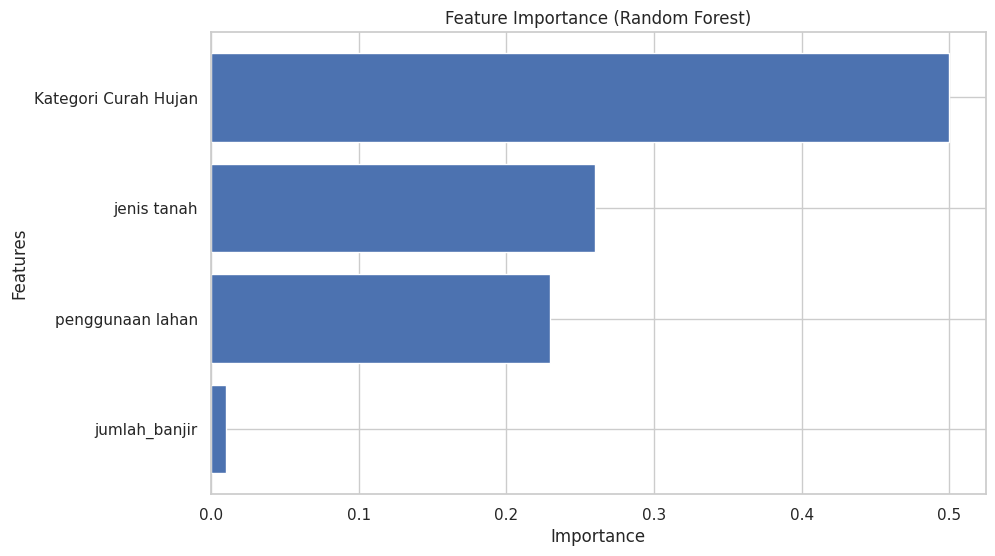

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil pentingnya fitur
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Urutkan fitur berdasarkan kepentingan
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
#proses cross-validation

from sklearn.model_selection import cross_val_score

# Pisahkan fitur (X) dan target (y)
X = merged_df[['Kategori Curah Hujan', 'penggunaan lahan', 'jenis tanah', 'jumlah_banjir']]
y = merged_df['Labeling']  # Kolom target

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.         1.         0.98076923 1.         0.96153846]
Mean cross-validation score: 0.9884615384615385


In [ ]:
rf_classifier

RandomForestClassifier(random_state=42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## test overfitting

### Analisis Awal untuk Overfitting

In [ ]:
rf_classifier.fit(X_train, y_train)

# Evaluasi akurasi pada data latih dan data uji
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print(f"Akurasi pada data latih: {train_accuracy:.4f}")
print(f"Akurasi pada data uji: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:
    print("Model mungkin mengalami overfitting.")
else:
    print("Model tidak menunjukkan tanda-tanda overfitting.")


Akurasi pada data latih: 1.0000
Akurasi pada data uji: 0.9811
Model tidak menunjukkan tanda-tanda overfitting.


### Optimasi Parameter Random Forest

In [ ]:
# Optimasi Random Forest untuk mengatasi overfitting
optimized_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,              # Batasi kedalaman pohon
    min_samples_split=10,      # Minimum 10 sampel untuk membagi node
    min_samples_leaf=5,        # Minimum 5 sampel per daun
    max_features='sqrt',       # Pertimbangkan hanya akar kuadrat dari total fitur
    random_state=42
)

# Latih model
optimized_rf.fit(X_train, y_train)

# Evaluasi model yang telah dioptimasi
train_accuracy_opt = optimized_rf.score(X_train, y_train)
test_accuracy_opt = optimized_rf.score(X_test, y_test)

print(f"Akurasi pada data latih (Optimasi): {train_accuracy_opt:.4f}")
print(f"Akurasi pada data uji (Optimasi): {test_accuracy_opt:.4f}")


Akurasi pada data latih (Optimasi): 1.0000
Akurasi pada data uji (Optimasi): 0.9811


### Data Balancing

In [ ]:
# Gunakan class_weight='balanced' untuk menangani ketidakseimbangan kelas
balanced_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

balanced_rf.fit(X_train, y_train)
balanced_accuracy = balanced_rf.score(X_test, y_test)
print(f"Akurasi dengan balancing kelas: {balanced_accuracy:.4f}")


Akurasi dengan balancing kelas: 0.9811


### Visual Learning Curve

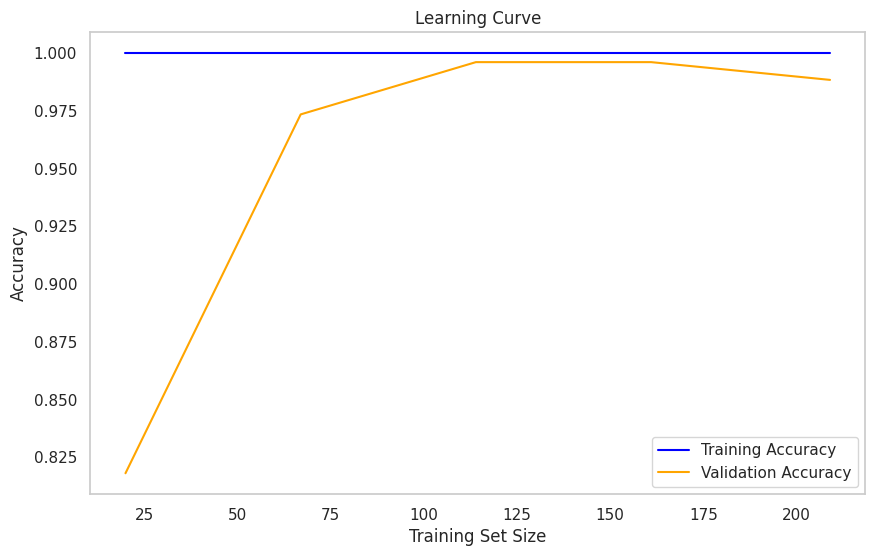

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(rf_classifier, X, y)

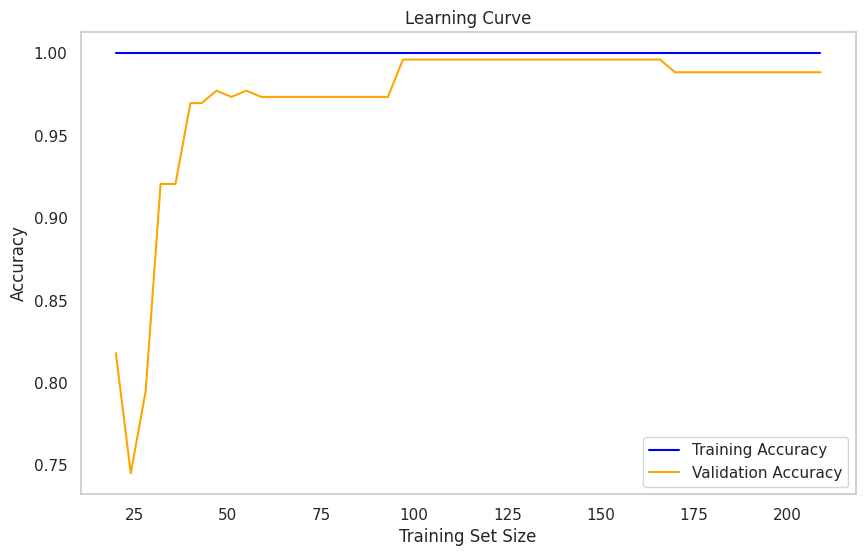

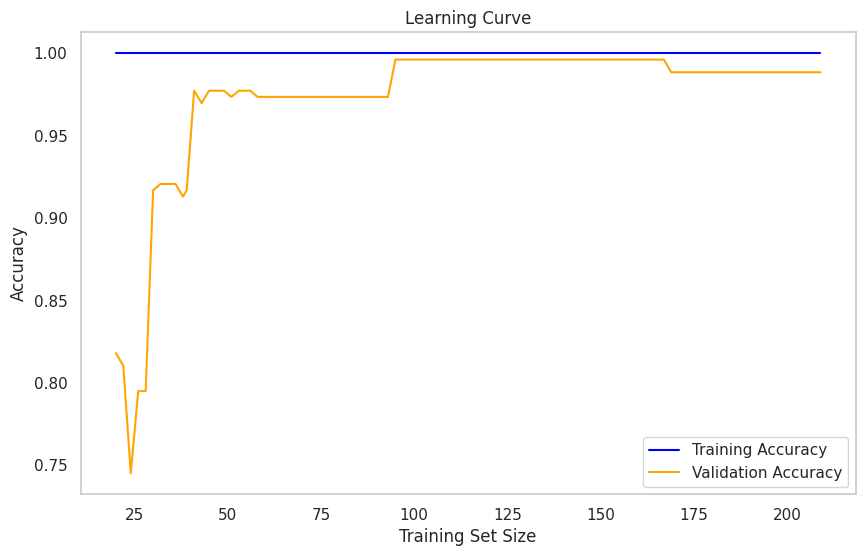

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 190 instead of 200.
  warnings.warn(


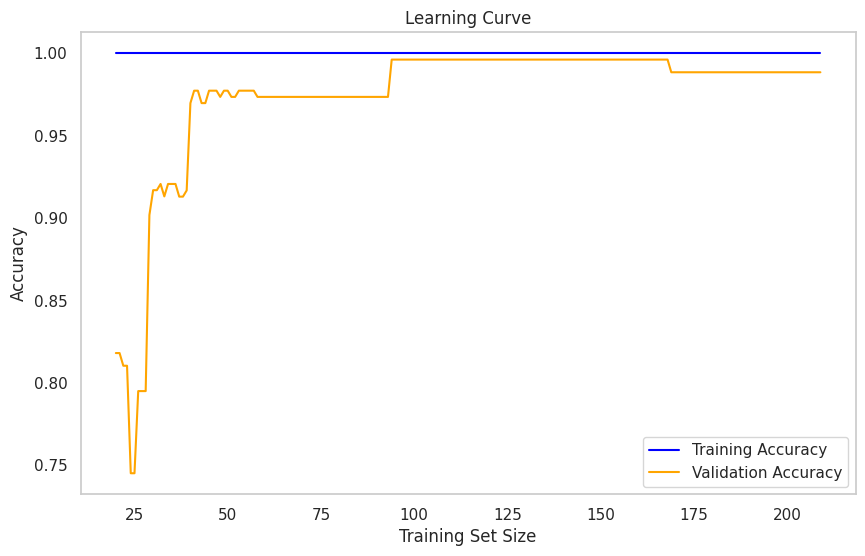

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve50(estimator, X, y, cv=5):
    train_sizes = np.linspace(0.1, 1.0, 50) #dengan 50 interval
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve50(rf_classifier, X, y)

def plot_learning_curve100(estimator, X, y, cv=5):
    train_sizes = np.linspace(0.1, 1.0, 100) #dengan 100 interval
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve100(rf_classifier, X, y)

def plot_learning_curve200(estimator, X, y, cv=5):
    train_sizes = np.linspace(0.1, 1.0, 200) #dengan 200 interval
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve200(rf_classifier, X, y)